### 활성화함수와 최적화함수를 다르게 했을때 학습결과 비교

In [ ]:
# 기본라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# 손글씨데이터 불러오기
from tensorflow.keras.datasets import mnist

In [ ]:
# 데이터분리 확인
(X_train, y_train), (X_test, y_test ) =mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape , y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

### 조합1
- 층 5층 (64,128,256,128,64)
1. sigmoid + SGD (model2)

2. relu + SGD(model2)

3. relu + Adam (model3)


In [ ]:
from tensorflow.keras import Sequential # 뼈대
from tensorflow.keras.layers import Dense, InputLayer, Flatten
from tensorflow.keras.optimizers import SGD, Adam
#최적화함수 클래스  불러와서 사용 -> 하이퍼파라미터 조정 가능 -> 학습률 변경

#1. sigmoid + SGD
model2 = Sequential()

model2.add(InputLayer(input_shape=(28,28)))
model2.add(Flatten())

model2.add(Dense(units=64, activation='sigmoid'))
model2.add(Dense(units=128, activation='sigmoid'))
model2.add(Dense(units=256, activation='sigmoid'))
model2.add(Dense(units=128, activation='sigmoid'))
model2.add(Dense(units=64, activation='sigmoid'))

model2.add(Dense(units=10, activation='softmax'))

model2.compile(loss='sparse_categorical_crossentropy',
        optimizer=Adam(learning_rate=0.001),  # SGD 기본학습률: 0.001
        metrics=['accuracy'])

h2 = model2.fit(X_train, y_train, validation_split = 0.2, epochs = 20, batch_size = 64)

model2.evaluate(X_test, y_test)

# model2 정확도가 낮게 나온 이유?
# SGD 최적화함수 문제? -> 변경
# 활성화함수 sigmoid -> 변경 -> 기울기 소실(다층)

Epoch 1/20
750/750 [==============================] - 5s 6ms/step - loss: 2.3066 - accuracy: 0.1107 - val_loss: 2.3025 - val_accuracy: 0.1060
Epoch 2/20
750/750 [==============================] - 4s 5ms/step - loss: 2.3011 - accuracy: 0.1137 - val_loss: 2.3017 - val_accuracy: 0.1060
Epoch 3/20
750/750 [==============================] - 4s 5ms/step - loss: 2.3011 - accuracy: 0.1136 - val_loss: 2.3024 - val_accuracy: 0.1060
Epoch 4/20
750/750 [==============================] - 5s 6ms/step - loss: 2.3007 - accuracy: 0.1145 - val_loss: 2.3020 - val_accuracy: 0.1060
Epoch 5/20
750/750 [==============================] - 4s 5ms/step - loss: 2.3004 - accuracy: 0.1139 - val_loss: 2.3013 - val_accuracy: 0.1060
Epoch 6/20
750/750 [==============================] - 4s 5ms/step - loss: 2.3002 - accuracy: 0.1139 - val_loss: 2.3015 - val_accuracy: 0.1060
Epoch 7/20
750/750 [==============================] - 5s 7ms/step - loss: 2.3000 - accuracy: 0.1141 - val_loss: 2.3002 - val_accuracy: 0.1060
Epoch 

[2.2860121726989746, 0.11349999904632568]

In [ ]:
#1. relu + SGD
model2 = Sequential()

model2.add(InputLayer(input_shape=(28,28)))
model2.add(Flatten())

model2.add(Dense(units=64, activation='relu'))
model2.add(Dense(units=128, activation='relu'))
model2.add(Dense(units=256, activation='relu'))
model2.add(Dense(units=128, activation='relu'))
model2.add(Dense(units=64, activation='relu'))

model2.add(Dense(units=10, activation='softmax'))

model2.compile(loss='sparse_categorical_crossentropy',
        optimizer=SGD(learning_rate=0.001),  # SGD 기본학습률: 0.001
        metrics=['accuracy'])
# relu 함수를 사용하면 오차가 줄어들지 않게 되는것
# 에러가 크게 출력 (기울기 소실이 일어나지 않음)
# 에러가 그대로 전달이 되면서 변동이 크게 일어난다
# SGD 함수의 기본학습률 0.01
# 학습률을 줄어보자! 0.001


h1 = model2.fit(X_train, y_train, validation_split = 0.2, epochs = 20, batch_size = 64)

model2.evaluate(X_test, y_test)

Epoch 1/20
750/750 [==============================] - 5s 5ms/step - loss: 3.6363 - accuracy: 0.1880 - val_loss: 2.0430 - val_accuracy: 0.2033
Epoch 2/20
750/750 [==============================] - 5s 6ms/step - loss: 2.0170 - accuracy: 0.2110 - val_loss: 2.0190 - val_accuracy: 0.2067
Epoch 3/20
750/750 [==============================] - 4s 5ms/step - loss: 2.0000 - accuracy: 0.2112 - val_loss: 2.0064 - val_accuracy: 0.2153
Epoch 4/20
750/750 [==============================] - 4s 5ms/step - loss: 1.9957 - accuracy: 0.2193 - val_loss: 2.0051 - val_accuracy: 0.2111
Epoch 5/20
750/750 [==============================] - 5s 7ms/step - loss: 1.8813 - accuracy: 0.2668 - val_loss: 1.6682 - val_accuracy: 0.3588
Epoch 6/20
750/750 [==============================] - 4s 5ms/step - loss: 1.4926 - accuracy: 0.3977 - val_loss: 1.4394 - val_accuracy: 0.4474
Epoch 7/20
750/750 [==============================] - 4s 5ms/step - loss: 1.2893 - accuracy: 0.4689 - val_loss: 1.2580 - val_accuracy: 0.5166
Epoch 

[0.6187726855278015, 0.8023999929428101]

In [ ]:
#3. relu + Adam
model3 = Sequential()

model3.add(InputLayer(input_shape=(28,28)))
model3.add(Flatten())

model3.add(Dense(units=64, activation='relu'))
model3.add(Dense(units=128, activation='relu'))
model3.add(Dense(units=256, activation='relu'))
model3.add(Dense(units=128, activation='relu'))
model3.add(Dense(units=64, activation='relu'))

model3.add(Dense(units=10, activation='softmax'))

model3.compile(loss='sparse_categorical_crossentropy',
        optimizer=Adam(learning_rate=0.001),  # SGD 기본학습률: 0.001
        metrics=['accuracy'])

h3 = model3.fit(X_train, y_train, validation_split = 0.2, epochs = 20, batch_size = 64)

model3.evaluate(X_test, y_test)

Epoch 1/20
750/750 [==============================] - 5s 6ms/step - loss: 0.6736 - accuracy: 0.8430 - val_loss: 0.2628 - val_accuracy: 0.9233
Epoch 2/20
750/750 [==============================] - 5s 7ms/step - loss: 0.2225 - accuracy: 0.9339 - val_loss: 0.1959 - val_accuracy: 0.9448
Epoch 3/20
750/750 [==============================] - 4s 6ms/step - loss: 0.1655 - accuracy: 0.9504 - val_loss: 0.1716 - val_accuracy: 0.9522
Epoch 4/20
750/750 [==============================] - 4s 6ms/step - loss: 0.1385 - accuracy: 0.9589 - val_loss: 0.1666 - val_accuracy: 0.9497
Epoch 5/20
750/750 [==============================] - 5s 7ms/step - loss: 0.1165 - accuracy: 0.9650 - val_loss: 0.1480 - val_accuracy: 0.9593
Epoch 6/20
750/750 [==============================] - 5s 7ms/step - loss: 0.1047 - accuracy: 0.9686 - val_loss: 0.1457 - val_accuracy: 0.9609
Epoch 7/20
750/750 [==============================] - 9s 11ms/step - loss: 0.0938 - accuracy: 0.9722 - val_loss: 0.1420 - val_accuracy: 0.9593
Epoch

[0.2046220600605011, 0.9639000296592712]

In [ ]:
# 시각화
plt.figure(figsize=(15,5))
plt.plot(h1.history['loss'], label = 'loss')
plt.plot(h1.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

### callback 함수
- 모델 저장, 모델 조기학습중단
  - 모델저장: 딥러닝 모델 학습 시 지정된 epochs 를 크게 설정한 경우 모델학습이 종료되었을 때 과대적합이 되는 경우가 있다 -> 중간에 일반화된 모델을 저장할 수 있는 기능
  - 모델 조기학습 중단: epochs를 크게 설정했을 경우 일정횟수 이상으로는 모델의 성능이 개선되지 않을 경우 시간이 낭비된다 -> 모델의 성능이 개선되지 않는 경우에는 조기에 학습을 중단 기능

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# 모델 저장, 모델 조기학습 중단

In [ ]:
from re import VERBOSE
# 모델 저장
# google drive와 연결 (마운트)
model_path="/content/drive/MyDrive/Colab Notebooks/DeepLearning/data/model_save_1/best_model_{epoch:02d}_{val_accuracy:0.3f}.hdf5"
mc =ModelCheckpoint(filepath = model_path, # 모델의 저장 경로
                    verbose = 1, # 로그출력 (0:로그출력X, 1:로그출력O)
                    save_best_only = True, # 모델 성능이 최고점을 갱신할때만 저장(안하면 매epoch마다 저장)
                    monitor = 'val_accuracy' # 모델성능을 확인할 기준
# 모델 저장 객체 생성 완료~
                    )

In [ ]:
# 모델 조기학습 중단
es = EarlyStopping(monitor = 'val_accuracy', # 조기중단의 기준이됨
                   verbose=1, # 로그 출력
                   patience = 10 # 모델 성능의 개선을 기다려주는 횟수. 10번동안성능이 올라가지 않는다면 모델학습 중단
                   )

In [ ]:
#1. sigmoid + SGD
model1 = Sequential()

model1.add(InputLayer(input_shape=(28,28)))
model1.add(Flatten())

model1.add(Dense(units=64, activation='sigmoid'))
model1.add(Dense(units=128, activation='sigmoid'))
model1.add(Dense(units=256, activation='sigmoid'))
model1.add(Dense(units=128, activation='sigmoid'))
model1.add(Dense(units=64, activation='sigmoid'))

model1.add(Dense(units=10, activation='softmax'))

model1.compile(loss='sparse_categorical_crossentropy',
        optimizer=Adam(learning_rate=0.001),  # SGD 기본학습률: 0.001
        metrics=['accuracy'])

h1 = model1.fit(X_train, y_train, batch_size = 64, validation_split = 0.2, epochs = 1000,
                callbacks = [mc,es])

model1.evaluate(X_test, y_test)

Epoch 1/1000
750/750 [==============================] - ETA: 0s - loss: 1.3680 - accuracy: 0.5038
Epoch 1: val_accuracy improved from -inf to 0.72750, saving model to /content/drive/MyDrive/Colab Notebooks/DeepLearning/data/model_save_1/best_model_01_0.73.hdf5
750/750 [==============================] - 7s 8ms/step - loss: 1.3680 - accuracy: 0.5038 - val_loss: 0.8118 - val_accuracy: 0.7275
Epoch 2/1000
 22/750 [..............................] - ETA: 3s - loss: 0.8301 - accuracy: 0.7124

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


744/750 [============================>.] - ETA: 0s - loss: 0.7187 - accuracy: 0.7653
Epoch 2: val_accuracy improved from 0.72750 to 0.81892, saving model to /content/drive/MyDrive/Colab Notebooks/DeepLearning/data/model_save_1/best_model_02_0.82.hdf5
750/750 [==============================] - 4s 6ms/step - loss: 0.7178 - accuracy: 0.7655 - val_loss: 0.5903 - val_accuracy: 0.8189
Epoch 3/1000
750/750 [==============================] - ETA: 0s - loss: 0.5708 - accuracy: 0.8229
Epoch 3: val_accuracy improved from 0.81892 to 0.84217, saving model to /content/drive/MyDrive/Colab Notebooks/DeepLearning/data/model_save_1/best_model_03_0.84.hdf5
750/750 [==============================] - 4s 6ms/step - loss: 0.5708 - accuracy: 0.8229 - val_loss: 0.5148 - val_accuracy: 0.8422
Epoch 4/1000
745/750 [============================>.] - ETA: 0s - loss: 0.5022 - accuracy: 0.8466
Epoch 4: val_accuracy improved from 0.84217 to 0.86792, saving model to /content/drive/MyDrive/Colab Notebooks/DeepLearning/d

[0.15780137479305267, 0.9537000060081482]

In [ ]:
model_path="/content/drive/MyDrive/Colab Notebooks/DeepLearning/data/model_save_2/best_model_{epoch:02d}_{val_accuracy:0.3f}.hdf5"
mc2 =ModelCheckpoint(filepath = model_path, # 모델의 저장 경로
                    verbose = 1, # 로그출력 (0:로그출력X, 1:로그출력O)
                    save_best_only = True, # 모델 성능이 최고점을 갱신할때만 저장(안하면 매epoch마다 저장)
                    monitor = 'val_accuracy' # 모델성능을 확인할 기준
)
# 모델 조기학습 중단
es2 = EarlyStopping(monitor = 'val_accuracy', # 조기중단의 기준이됨
                   verbose=1, # 로그 출력
                   patience = 10 # 모델 성능의 개선을 기다려주는 횟수. 10번동안성능이 올라가지 않는다면 모델학습 중단
                   )

In [ ]:
#3. relu + Adam
model3 = Sequential()

model3.add(InputLayer(input_shape=(28,28)))
model3.add(Flatten())

model3.add(Dense(units=64, activation='relu'))
model3.add(Dense(units=128, activation='relu'))
model3.add(Dense(units=256, activation='relu'))
model3.add(Dense(units=128, activation='relu'))
model3.add(Dense(units=64, activation='relu'))

model3.add(Dense(units=10, activation='softmax'))

model3.compile(loss='sparse_categorical_crossentropy',
        optimizer=Adam(learning_rate=0.001),  # SGD 기본학습률: 0.001
        metrics=['accuracy'])

h3 = model3.fit(X_train, y_train, validation_split = 0.2, epochs = 1000, batch_size = 64,
                callbacks=[mc2,es2])

model3.evaluate(X_test, y_test)

Epoch 1/1000
744/750 [============================>.] - ETA: 0s - loss: 0.5891 - accuracy: 0.8531
Epoch 1: val_accuracy did not improve from 0.97308
750/750 [==============================] - 5s 6ms/step - loss: 0.5865 - accuracy: 0.8536 - val_loss: 0.2516 - val_accuracy: 0.9245
Epoch 2/1000
741/750 [============================>.] - ETA: 0s - loss: 0.2035 - accuracy: 0.9406
Epoch 2: val_accuracy did not improve from 0.97308
750/750 [==============================] - 4s 5ms/step - loss: 0.2029 - accuracy: 0.9408 - val_loss: 0.1756 - val_accuracy: 0.9479
Epoch 3/1000
739/750 [============================>.] - ETA: 0s - loss: 0.1462 - accuracy: 0.9572
Epoch 3: val_accuracy did not improve from 0.97308
750/750 [==============================] - 6s 7ms/step - loss: 0.1453 - accuracy: 0.9574 - val_loss: 0.1732 - val_accuracy: 0.9527
Epoch 4/1000
750/750 [==============================] - ETA: 0s - loss: 0.1248 - accuracy: 0.9625
Epoch 4: val_accuracy did not improve from 0.97308
750/750 [==

[0.17920903861522675, 0.9718000292778015]

### 우리가 직접 작성한 손글씨데이터 불러와서 모델의 정확도 확인

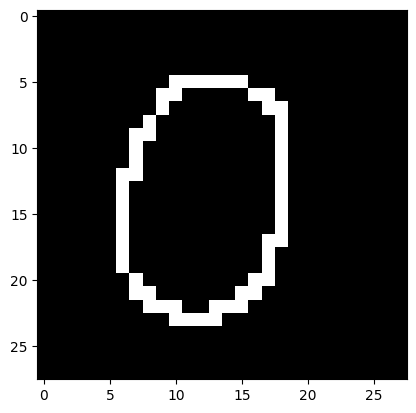

In [33]:
# 파이썬에서 이미지를 처리하는 라이브러리
import PIL.Image as pimg

img= pimg.open('/content/drive/MyDrive/Colab Notebooks/DeepLearning/data/0.png').convert('L')

np.array(img).shape
plt.imshow(img, cmap='gray')

In [35]:
# 전처리
# 이미지데이터를 배열로 변환
img = np.array(img)

In [38]:
# 학습시킨 이미지에 했던 전처리를 그대로 진행
# 2차원 -> 1차원 (reshape)
# reshape(데이터의 개수, 행, 열, 색상차원 (흑1백0?) )
testimg = img.reshape(1, 28, 28, 1)
testimg = testimg.astype('float32') / 255

In [39]:
# best 모델 불러오기!
from tensorflow.keras.models import load_model
best_model = load_model('/content/drive/MyDrive/Colab Notebooks/DeepLearning/data/model_save_1/best_model_97_0.96.hdf5')

In [40]:
# 예측
best_model.predict(testimg)

1/1 [==============================] - 0s 147ms/step


array([[7.66279221e-01, 1.81149997e-04, 1.77801162e-01, 9.19872709e-03,
        2.50647514e-04, 2.65368298e-02, 1.03501916e-04, 9.50312940e-04,
        5.10209613e-03, 1.35963922e-02]], dtype=float32)

In [41]:
# 예측한 클래스만 출력
best_model.predict(testimg).argmax()

1/1 [==============================] - 0s 54ms/step


0

In [46]:
img2 = pimg.open('/content/drive/MyDrive/Colab Notebooks/DeepLearning/data/9.png').convert('L')
img2 = np.array(img2)

In [47]:
testimg2 = img2.reshape(1,28,28,1)
testimg2 = testimg2.astype('float32') / 255

In [ ]:
best_model.predict()